In [ ]:
#Libs Necessárias

#Libs para Modelagem e Matrizez
import numpy as np
import pandas as pd

#Libs para anaálises gráficas
import matplotlib.pyplot as plt
import seaborn as sns

#Lib para ignorar avisos
import warnings

#Lib para transformar dados em números
from sklearn.preprocessing import LabelEncoder

#Desabilitando avisos
warnings.filterwarnings('ignore')

In [ ]:
#Lendo os dados
base_dados = pd.read_csv('XboxOne_GameSales.csv', encoding='latin-1')

#Verificando a leitura
base_dados

,Pos,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,1,Grand Theft Auto V,2014.0,Action,Rockstar Games,4.70,3.25,0.01,0.76,8.72
1,2,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,4.63,2.04,0.02,0.68,7.37
2,3,Call of Duty: WWII,2017.0,Shooter,Activision,3.75,1.91,0.00,0.57,6.23
3,4,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,3.76,1.47,0.00,0.54,5.77
4,5,MineCraft,2014.0,Misc,Microsoft Studios,3.23,1.71,0.00,0.49,5.43
...,...,...,...,...,...,...,...,...,...,...
608,609,Biomutant,2018.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
609,610,Biomutant,2019.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
610,611,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00
611,612,Outcast: Second Contact,2017.0,Adventure,Bigben Interactive,0.00,0.00,0.00,0.00,0.00


In [ ]:
#Verificando a dimensão dos dados
base_dados.shape

(613, 10)

In [ ]:
#Verificando a formato dos dados
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pos            613 non-null    int64  
 1   Game           613 non-null    object 
 2   Year           505 non-null    float64
 3   Genre          613 non-null    object 
 4   Publisher      505 non-null    object 
 5   North America  613 non-null    float64
 6   Europe         613 non-null    float64
 7   Japan          613 non-null    float64
 8   Rest of World  613 non-null    float64
 9   Global         613 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 48.0+ KB


In [ ]:
#Verificando os nulos
base_dados.isnull().sum()

,0
Pos,0
Game,0
Year,108
Genre,0
Publisher,108
North America,0
Europe,0
Japan,0
Rest of World,0
Global,0


In [ ]:
#Atualizando a base de dados para excluir os valores nulos
base_dados.dropna(inplace=True)

#Verificando se a atualização funcionou
base_dados.isnull().sum()

,0
Pos,0
Game,0
Year,0
Genre,0
Publisher,0
North America,0
Europe,0
Japan,0
Rest of World,0
Global,0


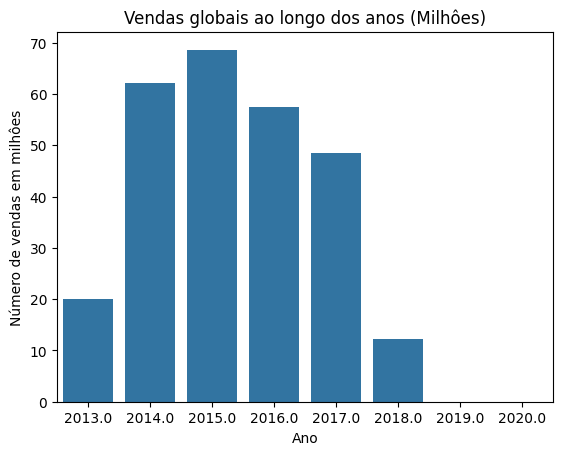

In [ ]:
#Gráfico de valor de vendas ao longo dos anos
plt.title('Vendas globais ao longo dos anos (Milhôes)') # Título
plt.xlabel('Ano')
plt.ylabel('Número de vendas em milhôes')
sns.barplot(data=base_dados, x='Year', y='Global', ci=None, estimator=sum); #Plotando o gráfico Obs: 'ci=None' remove as barras menores no gráfico e estimator=sum exibe a soma dos valores invés da média, que é o padrão

In [ ]:
#tirando os anos 2019 e 2020
base_dados = base_dados.loc[(base_dados['Year'] != 2019) & (base_dados['Year'] != 2020)]

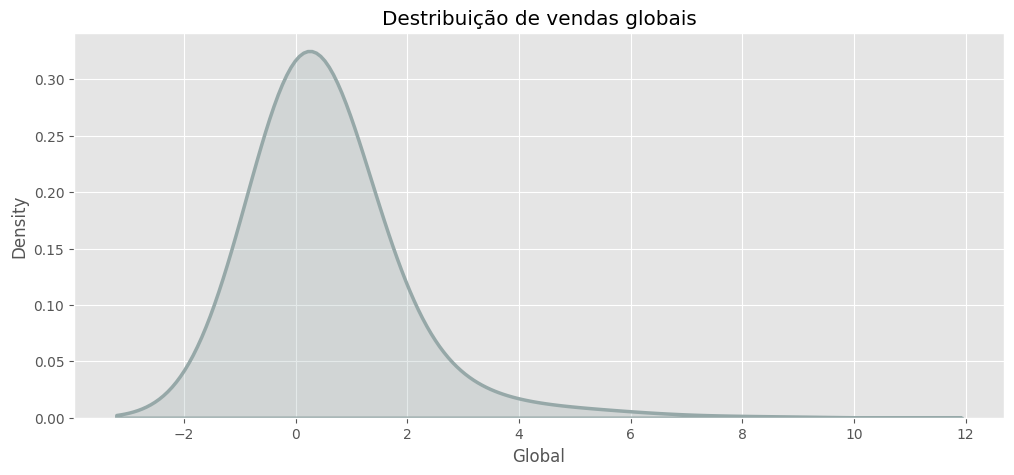

In [ ]:
#Plotando um gráfico dos valores globais

plt.figure(figsize=(12,5)) #Definindo tamanho da figura
plt.style.use('ggplot') #Definindo o estilo do gráfico
plt.title('Destribuição de vendas globais') #Definindo o título
sns.kdeplot(base_dados['Global'], shade=True, bw=1, color = '#96a8a8', linewidth = 2.5); #Plotando um gráfico de densidade

In [ ]:
#Consultando a venda de cada região por ano
base_dados.groupby(by=['Year'])[['North America', 'Europe', 'Japan', 'Rest of World', 'Global']].sum()

,North America,Europe,Japan,Rest of World,Global
Year,,,,,
2013.0,12.14,6.03,0.02,1.81,20.03
2014.0,35.92,20.56,0.17,5.51,62.12
2015.0,42.16,19.97,0.23,6.29,68.61
2016.0,34.19,17.90,0.08,5.27,57.37
2017.0,30.06,13.86,0.01,4.46,48.51
2018.0,8.21,2.84,0.00,1.15,12.20


<Axes: title={'center': 'Vendas globais durante os anos'}, xlabel='Year', ylabel='Global'>

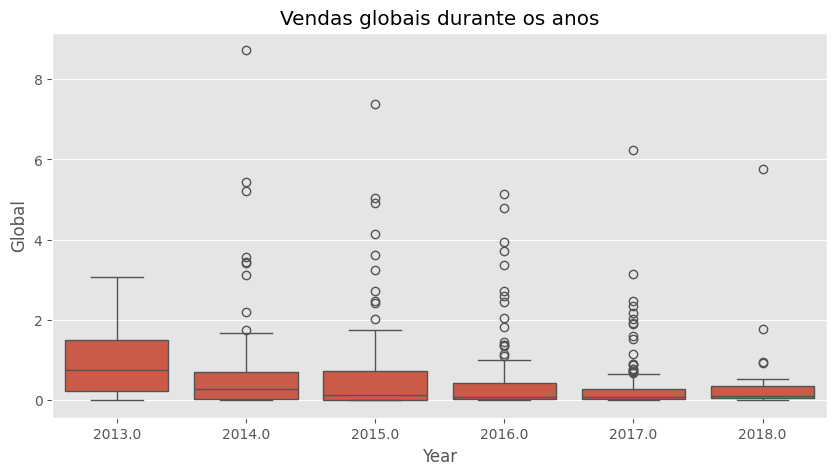

In [ ]:
#Criando um boxplot relacionando o ano com as vendas globais
plt.figure(figsize=(10,5)) #Tamanho da figura
plt.title('Vendas globais durante os anos') #Definindo o título
sns.boxplot(data=base_dados, x ='Year', y='Global')

In [ ]:
#Análise de continentes com base em sua porcentagem no valor global

#Criando a variável que analisa a soma de todos os anos
analise = base_dados.groupby(by=['Year'])[['North America', 'Europe', 'Japan', 'Rest of World', 'Global']].sum()
analise

,North America,Europe,Japan,Rest of World,Global
Year,,,,,
2013.0,12.14,6.03,0.02,1.81,20.03
2014.0,35.92,20.56,0.17,5.51,62.12
2015.0,42.16,19.97,0.23,6.29,68.61
2016.0,34.19,17.90,0.08,5.27,57.37
2017.0,30.06,13.86,0.01,4.46,48.51
2018.0,8.21,2.84,0.00,1.15,12.20


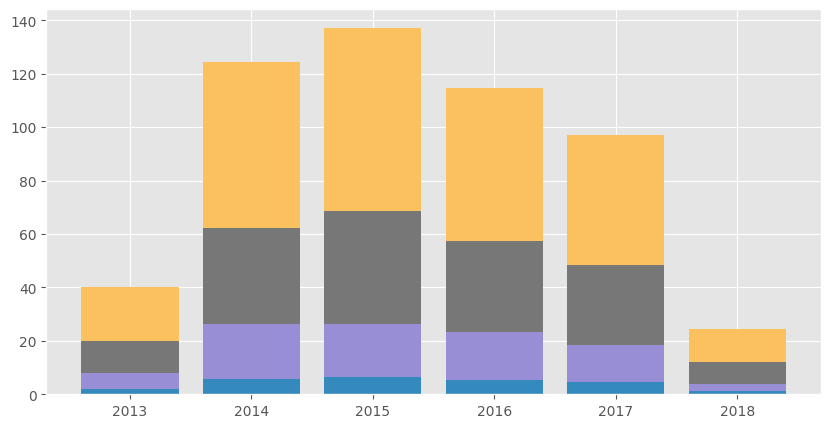

In [ ]:
#Plotando um gráfico comparando as vendas de cada continente com as vendas globais para cada ano
plt.figure(figsize=(10,5))
plt.bar(analise.index, analise['Japan'])
plt.bar(analise.index, analise['Rest of World'], bottom=analise['Japan'])
plt.bar(analise.index, analise['Europe'], bottom=analise['Rest of World'] + analise['Japan'])
plt.bar(analise.index, analise['North America'], bottom=analise['Europe'] + analise['Rest of World'] + analise['Japan'])
plt.bar(analise.index, analise['Global'], bottom=analise['North America'] + analise['Europe'] + analise['Rest of World'] + analise['Japan']);

In [ ]:
#Chamando todas as publishers
base_dados['Publisher'].unique()

array(['Rockstar Games', 'Activision', 'Microsoft Studios',
       'Electronic Arts', 'Bethesda Softworks', 'Ubisoft', 'EA Sports',
       'Blizzard Entertainment', '2K Sports',
       'Warner Bros. Interactive Entertainment', 'Namco Bandai Games',
       'Square Enix', '505 Games', '2K Games', 'Capcom',
       'Konami Digital Entertainment', 'Mojang', 'Gearbox Software',
       'Harmonix Music Systems', 'Take-Two Interactive',
       'Disney Interactive Studios', 'Sega', 'Studio Wildcard',
       'Bandai Namco Games', 'Focus Home Interactive', 'Deep Silver',
       'Rebellion Developments', 'Telltale Games', 'Gun Media',
       'Codemasters', 'Majesco Entertainment', 'Koch Media', 'Astragon',
       'City Interactive', 'Sold Out', 'Tecmo Koei', 'Insomniac Games',
       'THQ Nordic', 'Milestone S.r.l.', 'Dusenberry Martin Racing',
       'Soedesco', 'Koei Tecmo', 'Bigben Interactive', 'Milestone',
       'Milestone S.r.l', 'Frontier Developments', 'Nordic Games',
       'PQube', 'Rave

In [ ]:
#Transformando as publisher em números
base_dados['Publisher code'] = LabelEncoder().fit_transform(base_dados['Publisher']) #Liga uma Publisher a um Número
base_dados['Genre code'] = LabelEncoder().fit_transform(base_dados['Genre']) #Liga uma publisher a um Número
base_dados['Game code'] = LabelEncoder().fit_transform(base_dados['Game']) #Liga uma publisher a um Número

base_dados

,Pos,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Publisher code,Genre code,Game code
0,1,Grand Theft Auto V,2014.0,Action,Rockstar Games,4.70,3.25,0.01,0.76,8.72,67,0,166
1,2,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,4.63,2.04,0.02,0.68,7.37,5,11,60
2,3,Call of Duty: WWII,2017.0,Shooter,Activision,3.75,1.91,0.00,0.57,6.23,5,11,64
3,4,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,3.76,1.47,0.00,0.54,5.77,67,1,328
4,5,MineCraft,2014.0,Misc,Microsoft Studios,3.23,1.71,0.00,0.49,5.43,48,5,245
...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,607,Moons Of Madness,2018.0,Role-Playing,Unknown,0.00,0.00,0.00,0.00,0.00,90,10,253
607,608,Iron Harvest,2018.0,Strategy,Unknown,0.00,0.00,0.00,0.00,0.00,90,14,183
608,609,Biomutant,2018.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00,77,0,47
610,611,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00,77,7,490


In [ ]:
#Paletas de cores para customizar gráficos
paleta = sns.color_palette('husl', 15) #Armazena a paleta em uma variável, define as cores da paleta e quantas cores
paleta

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.9542900080364486, 0.4779505175890752, 0.1963917622115608),
 (0.7930046244373694, 0.5708100522446624, 0.19489531984381053),
 (0.6804189127793346, 0.6151497514677574, 0.19405452111445337),
 (0.5571803870240879, 0.6507747739933957, 0.19331667588333168),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.20125317221201128, 0.6907920815379025, 0.47966761189275336),
 (0.20774052347943134, 0.6813852191365138, 0.6002900398972028),
 (0.21316806282417172, 0.6731234926210208, 0.6838056741516414),
 (0.21979956608283252, 0.6625157876850336, 0.7732093159317208),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.5830408541921136, 0.5695319215803094, 0.9583591966369759),
 (0.8004936186423958, 0.47703363533737203, 0.9579547196007522),
 (0.959647907830888, 0.3748291312853892, 0.893004453766301),
 (0.9642903119819891, 0.41420146582831974, 0.7188681186026104)]

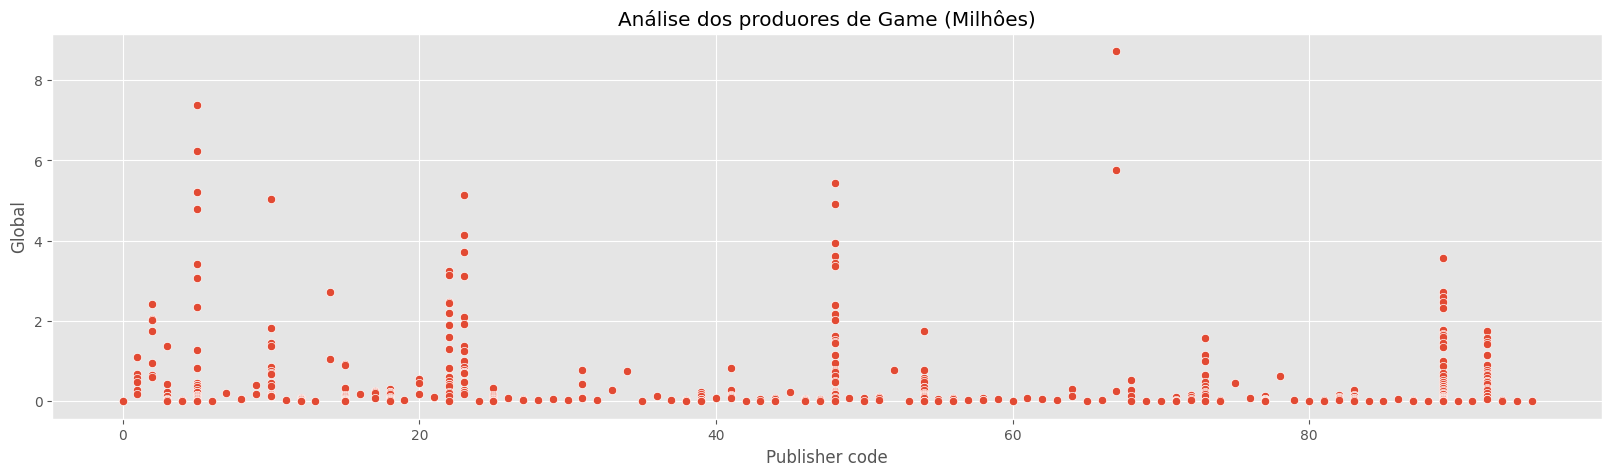

In [ ]:
#Fazendo uma análise relacionando a venda global de cada produtor
plt.figure(figsize=(20,5))
plt.title('Análise dos produores de Game (Milhôes)')
sns.scatterplot(data=base_dados, x='Publisher code', y='Global');

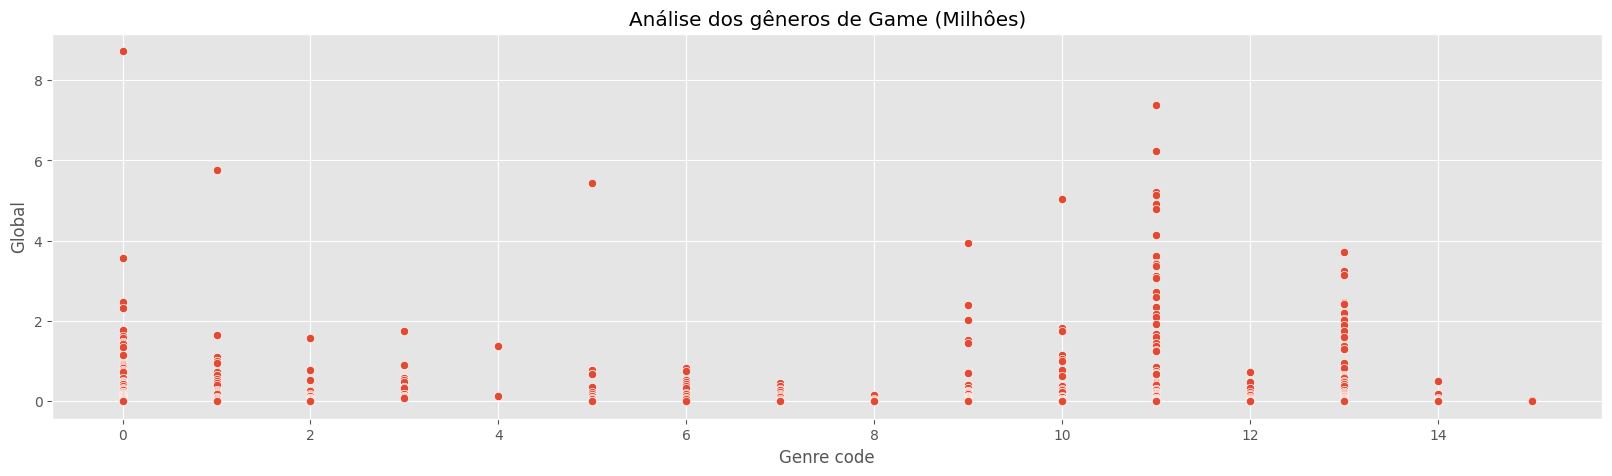

In [ ]:
#Fazendo uma análise relacionando a venda global de cada produtor
plt.figure(figsize=(20,5))
plt.title('Análise dos gêneros de Game (Milhôes)')
sns.scatterplot(data=base_dados, x='Genre code', y='Global');

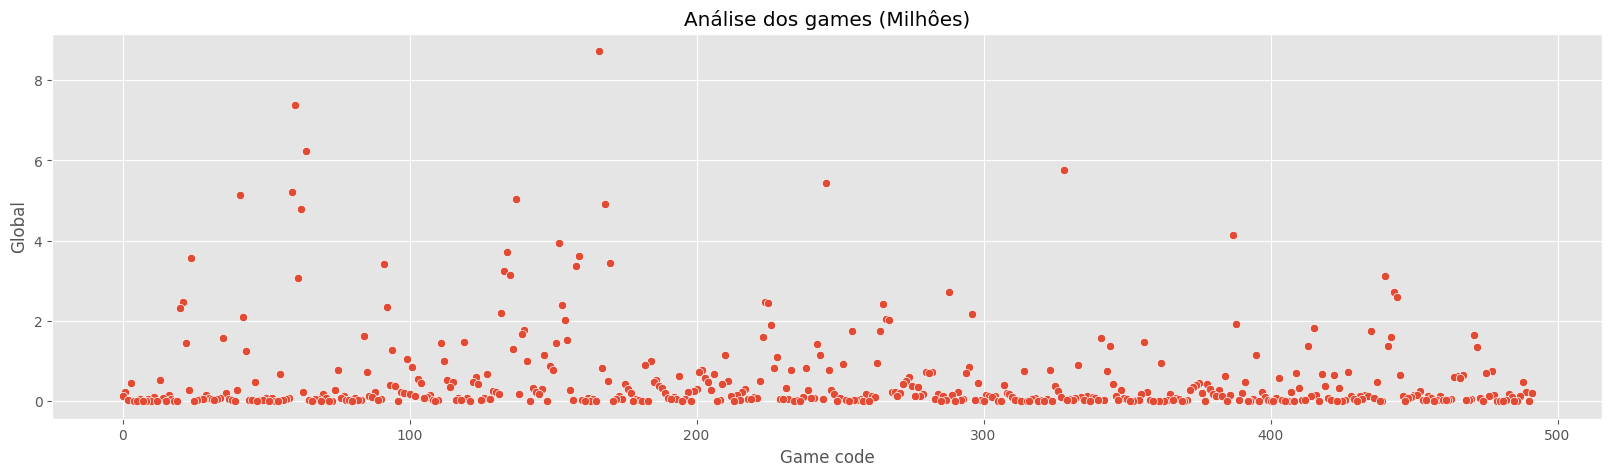

In [ ]:
#Fazendo uma análise relacionando a venda global de cada produtor
plt.figure(figsize=(20,5))
plt.title('Análise dos games (Milhôes)')
sns.scatterplot(data=base_dados, x='Game code', y='Global');

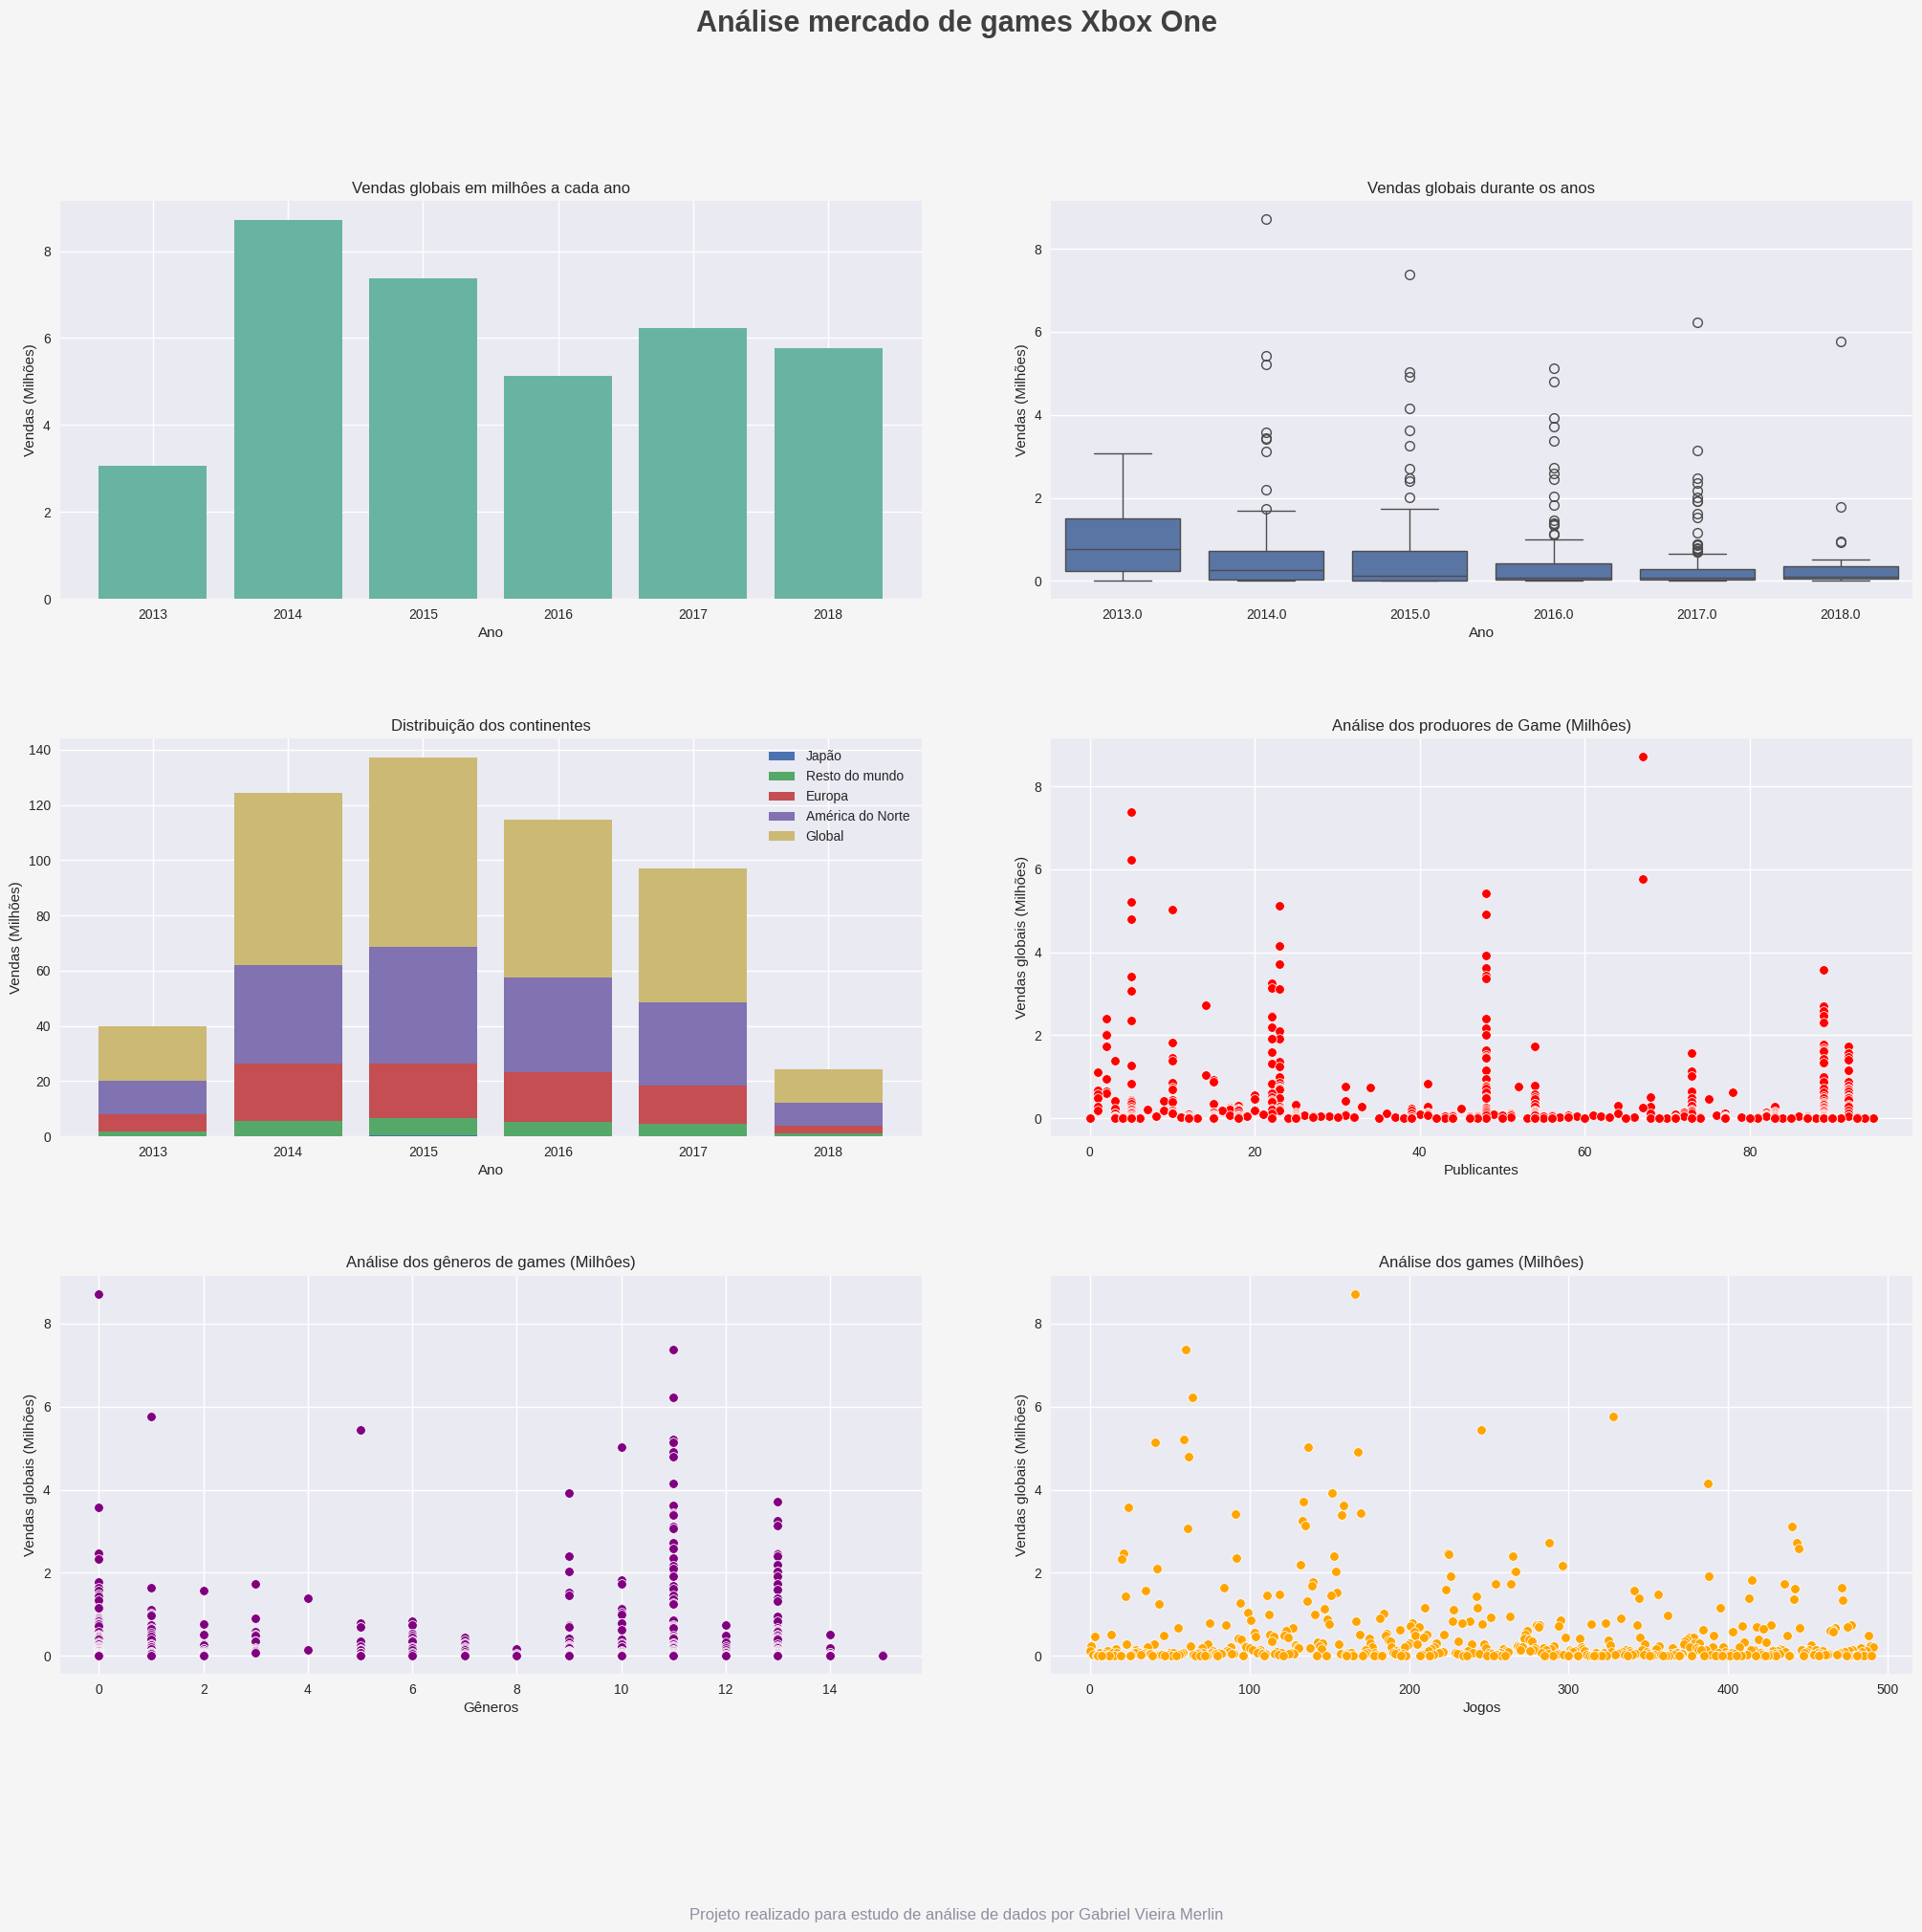

In [ ]:
#Relatórios gerenciais

#Definindo o tamanho da figura
fig, ax = plt.subplots(figsize=(25,20)) #ax se refere aos subplots e fig se refere a figura total

#Definindo cor de fundo para a figura
ax.set_facecolor('#f5f5f5')
fig.set_facecolor('#f5f5f5')

#Definindo o estilo dos gráficos
plt.style.use('seaborn')

#Definindo o título da figura
plt.suptitle('Análise mercado de games Xbox One', fontsize=22, color='#404040', fontweight=600)

#Definindo os subplots

#Vendas globais
plt.subplot(3, 2, 1) #Indicando o subplot 1
plt.title('Vendas globais em milhôes a cada ano') #Definindo o título do subplot
plt.bar(base_dados['Year'], base_dados['Global'], color='#69b3a2') #Plotando o gráfico
plt.xlabel('Ano') #Definindo o nome do eixo x
plt.ylabel('Vendas (Milhões)') #Definindo o nome do eixo y

#Distribuição de vendas durante os anos
plt.subplot(3, 2, 2) #Indicando o subplot 2
plt.title('Vendas globais durante os anos') #Definindo o título
sns.boxplot(data=base_dados, x ='Year', y='Global') #Plotando o gráfico
plt.xlabel('Ano') #Definindo o nome do eixo x
plt.ylabel('Vendas (Milhões)') #Definindo o nome do eixo y

#Vendas de cada continente em relação ao global
plt.subplot(3, 2, 3) #Indicando o subplot 3
plt.title('Distribuição dos continentes') #Definindo o título
plt.xlabel('Ano') #Definindo o nome do eixo x
plt.ylabel('Vendas (Milhões)') #Definindo o nome do eixo y
plt.bar(analise.index, analise['Japan'], label='Japão')
plt.bar(analise.index, analise['Rest of World'], bottom=analise['Japan'], label='Resto do mundo')
plt.bar(analise.index, analise['Europe'], bottom=analise['Rest of World'] + analise['Japan'], label='Europa')
plt.bar(analise.index, analise['North America'], bottom=analise['Europe'] + analise['Rest of World'] + analise['Japan'], label='América do Norte')
plt.bar(analise.index, analise['Global'], bottom=analise['North America'] + analise['Europe'] + analise['Rest of World'] + analise['Japan'], label='Global') #Plorando o gráfico
plt.legend() #Adicionando uma legenda

#Vendas das produtoras de games
plt.subplot(3, 2, 4) #Indicando o subplot 4
plt.title('Análise dos produores de Game (Milhôes)') #Definindo o título
plt.xlabel('Publicantes') #Definindo o nome do eixo x
plt.ylabel('Vendas globais (Milhões)') #Definindo o nome do eixo y
sns.scatterplot(data=base_dados, x='Publisher code', y='Global', color='red') #Plotando um gráfico scatter

#Vendas dos gêneros de jogos
plt.subplot(3, 2, 5) #Indicando o subplot 5
plt.title('Análise dos gêneros de games (Milhôes)') #Definindo o título
plt.xlabel('Gêneros') #Definindo o nome do eixo x
plt.ylabel('Vendas globais (Milhões)') #Definindo o nome do eixo y
sns.scatterplot(data=base_dados, x='Genre code', y='Global', color='purple') #Plotando o gráfico

#Vendas globais de cada jogo
plt.subplot(3, 2, 6) #Indicando o subplot 6
plt.title('Análise dos games (Milhôes)')
plt.xlabel('Jogos') #Definindo o nome do eixo x
plt.ylabel('Vendas globais (Milhões)') #Definindo o nome do eixo y
sns.scatterplot(data=base_dados, x='Game code', y='Global', color='orange') #Plotando o gráfico

#Ajustando o layout (altura, largura)
plt.subplots_adjust(hspace=0.35, wspace=0.15)

#Adicionando informação no rodapé
rodape= 'Projeto realizado para estudo de análise de dados por Gabriel Vieira Merlin'
fig.text(0.5, -0.02, rodape, ha='center', va='bottom', size=12, color='#938ca1');